<a href="https://colab.research.google.com/github/yeondub1121/prac-colab/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9912422/9912422 [00:00<00:00, 108516504.26it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30597548.33it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27916150.92it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4014017.86it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

cpu
0.24160148203372955
0.06720633059740067
0.04594569653272629
0.03746521472930908
0.03243047744035721
0.028562959283590317
0.027366120368242264
0.02452421747148037
0.024809831753373146
0.022692661732435226
torch.Size([96, 28, 28])


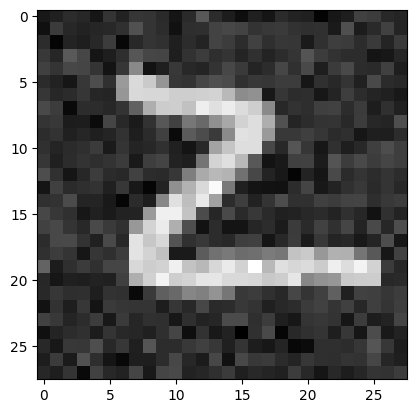

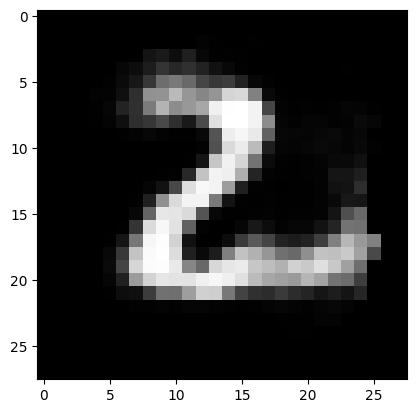

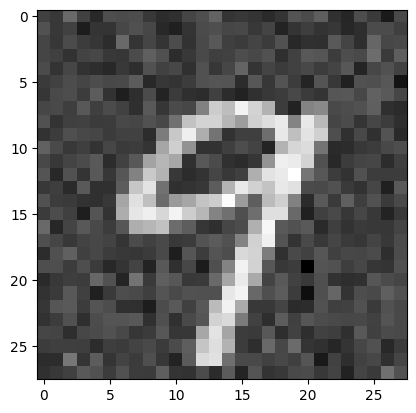

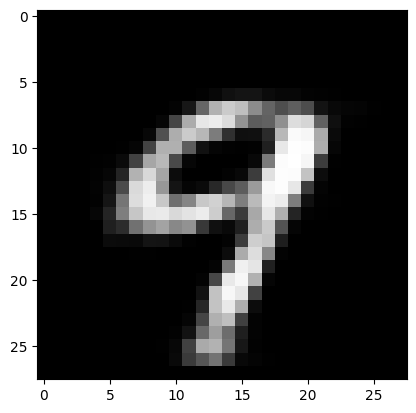

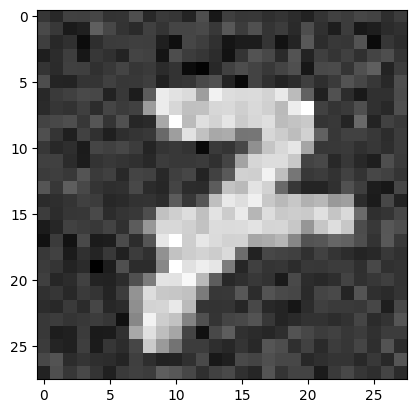

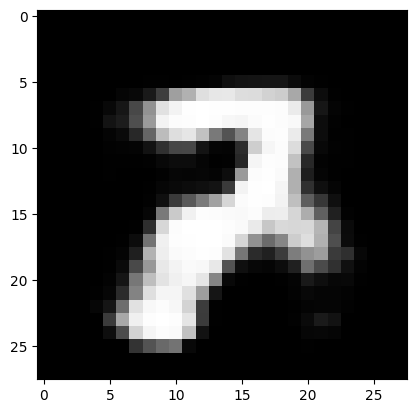

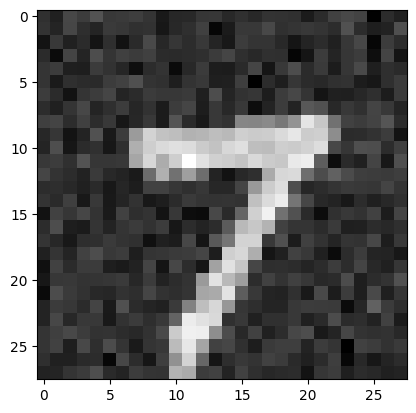

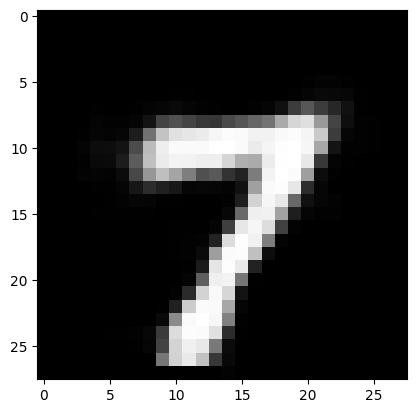

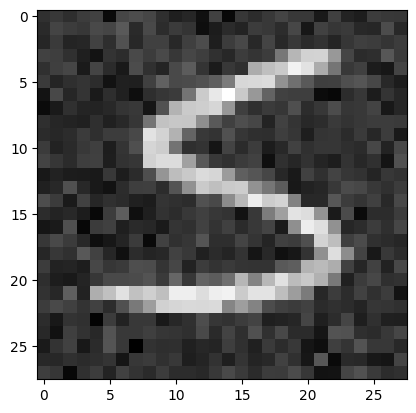

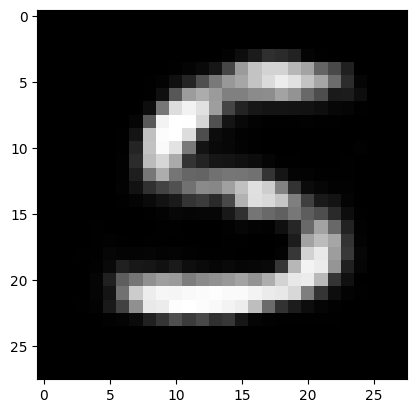

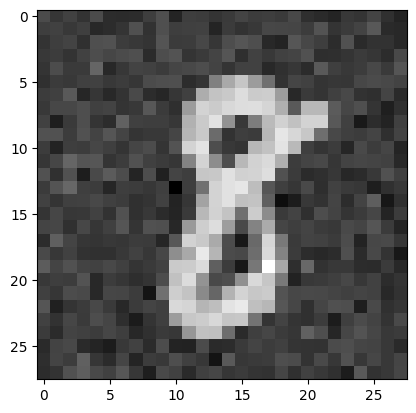

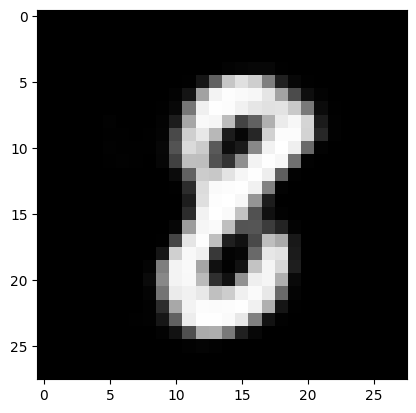

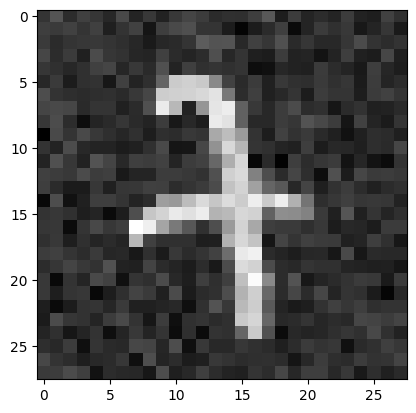

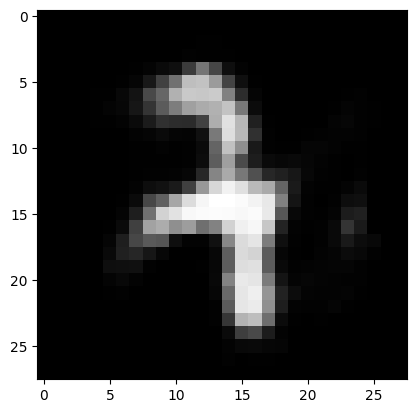

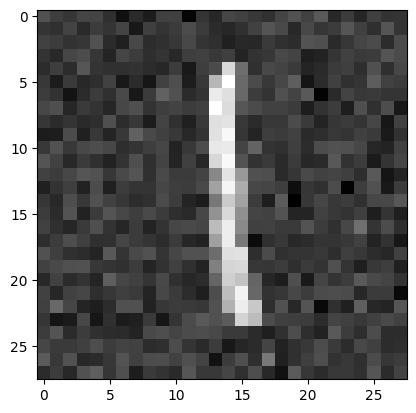

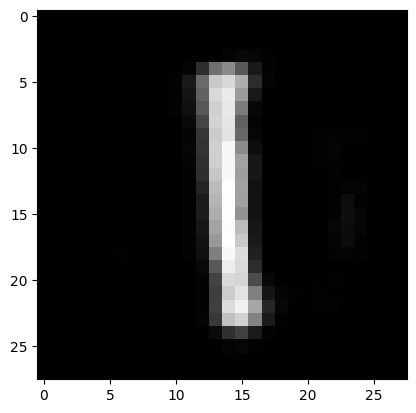

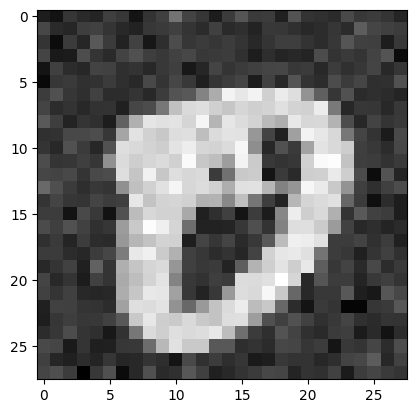

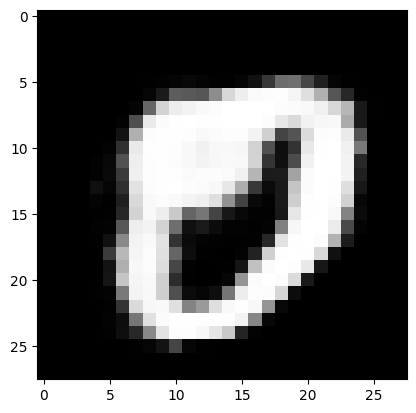

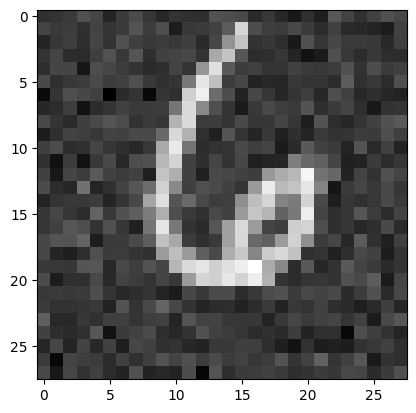

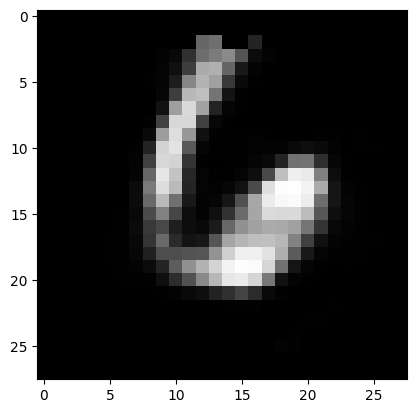

tensor(0.0227, grad_fn=<MseLossBackward0>)


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Hyperparameters
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

# Load MNIST dataset
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Autoencoder Model with 256-128-256 node structure
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid()  # 출력을 0과 1 사이로 조정하기 위해 Sigmoid 사용
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(-1, 1, 28, 28)
        return out


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

noise = torch.nn.init.normal_(torch.FloatTensor(batch_size, 1, 28, 28), 0, 0.1)

loss_arr = []
for epoch in range(num_epoch):
    for i, (image, _) in enumerate(train_loader):
        noise = torch.normal(0, 0.1, size=image.size())  # Add noise to the input image
        image = image + noise
        image = image.to(device)

        optimizer.zero_grad()
        output = model(image)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            print(loss.item())  # Print loss value
            loss_arr.append(loss.item())


out_img=torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).cpu().detach().numpy(), cmap='gray')  # Modify this line
    plt.show()
    plt.imshow(out_img[i].cpu().detach().numpy(), cmap='gray')  # This line should be fine
    plt.show()

with torch.no_grad():
  for i in range(1):
    for j,[image,label] in enumerate(test_loader):
      x=image.to(device)

      optimizer.zero_grad()
      output=model.forward(x)

      if j %1000==0:
        print(loss)
